# Can you find a better way to segment your customers?

## 📖 Background
You work for a medical device manufacturer in Switzerland. Your company manufactures orthopedic devices and sells them worldwide. The company sells directly to individual doctors who use them on rehabilitation and physical therapy patients.

Historically, the sales and customer support departments have grouped doctors by geography. However, the region is not a good predictor of the number of purchases a doctor will make or their support needs.

Your team wants to use a data-centric approach to segmenting doctors to improve marketing, customer service, and product planning. 

## 💪 Competition challenge

Create a report that covers the following:
1. How many doctors are there in each region? What is the average number of purchases per region?
2. Can you find a relationship between purchases and complaints?
3. Define new doctor segments that help the company improve marketing efforts and customer service.
4. Identify which features impact the new segmentation strategy the most.
5. Your team will need to explain the new segments to the rest of the company. Describe which characteristics distinguish the newly defined segments.

## 💾 The data

The company stores the information you need in the following four tables. Some of the fields are anonymized to comply with privacy regulations.

#### Doctors contains information on doctors. Each row represents one doctor.
- "DoctorID" - is a unique identifier for each doctor.
- "Region" - the current geographical region of the doctor.
- "Category" - the type of doctor, either 'Specialist' or 'General Practitioner.'
- "Rank" - is an internal ranking system. It is an ordered variable: The highest level is Ambassadors, followed by Titanium Plus, Titanium, Platinum Plus, Platinum, Gold Plus, Gold, Silver Plus, and the lowest level is Silver.
- "Incidence rate"  and "R rate" - relate to the amount of re-work each doctor generates.
- "Satisfaction" - measures doctors' satisfaction with the company.
- "Experience" - relates to the doctor's experience with the company.
- "Purchases" - purchases over the last year.

#### Orders contains details on orders. Each row represents one order; a doctor can place multiple orders.
- "DoctorID" - doctor id (matches the other tables).
- "OrderID" - order identifier.
- "OrderNum" - order number.
- "Conditions A through J" - map the different settings of the devices in each order. Each order goes to an individual patient.

#### Complaints collects information on doctor complaints.
- "DoctorID" - doctor id (matches the other tables).
- "Complaint Type" - the company's classification of the complaints.
- "Qty" - number of complaints per complaint type per doctor.

#### Instructions has information on whether the doctor includes special instructions on their orders.
- "DoctorID" - doctor id (matches the other tables).
- "Instructions" - 'Yes' when the doctor includes special instructions, 'No' when they do not.

## Question1. How many doctors are there in each region? What is the average number of purchases per region?

In [ ]:
doctors = pd.read_csv('data/doctors.csv')
doctors.head(2)

,DoctorID,Region,Category,Rank,Incidence rate,R rate,Satisfaction,Experience,Purchases
0,AHDCBA,4 15,Specialist,Ambassador,49.0,0.9,53.85,1.2,49.0
1,ABHAHF,1 8 T4,General Practitioner,Ambassador,37.0,0.0,100.00,0.0,38.0


### Data Understanding

    1- Checking the shape of the dataframe
    2- Generate an overview of the dataframe
    3- Checking the data for null values
    4- Check if the rows are duplicated in the dataframe


In [ ]:
doctors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DoctorID        437 non-null    object 
 1   Region          437 non-null    object 
 2   Category        437 non-null    object 
 3   Rank            435 non-null    object 
 4   Incidence rate  437 non-null    float64
 5   R rate          437 non-null    float64
 6   Satisfaction    437 non-null    object 
 7   Experience      437 non-null    float64
 8   Purchases       437 non-null    float64
dtypes: float64(4), object(5)
memory usage: 30.9+ KB


### Observation
- "Ranks" contains null values
- "Satisfaction" data type object

In [ ]:
#check duplicate:
doctors.duplicated().sum(),orders.duplicated().sum(),complaints.duplicated().sum(),instructions.duplicated().sum()

NameError: name 'orders' is not defined

- Tables are clean of duplication

In [ ]:
# Observe the columns with missing values
missing_doctors = pd.DataFrame(doctors.isna().sum(), columns=['% missing'])
missing_doctors

,% missing
DoctorID,0
Region,0
Category,0
Rank,2
Incidence rate,0
R rate,0
Satisfaction,0
Experience,0
Purchases,0


In [ ]:
# Check % of missing ranks
print('% of missing ranks:') 
(doctors.Rank.isna().sum()/doctors.DoctorID.count())

% of missing ranks:


0.004576659038901602

In [ ]:
# Since missing ranks represent 0.005 of total values, best option is to drop them
# Remove NA
doctors_clean = doctors.dropna(axis=0, subset=['Rank']).copy()

doctors_clean.describe()

,Incidence rate,R rate,Experience,Purchases
count,435.000000,435.000000,435.000000,435.000000
mean,5.049977,1.094161,0.528598,10.816092
std,4.188707,0.726976,0.599210,11.449879
min,2.050000,0.000000,0.000000,3.000000
25%,3.000000,0.600000,0.140000,4.000000
50%,4.000000,1.000000,0.380000,7.000000
75%,6.000000,1.500000,0.750000,13.000000
max,49.000000,4.250000,5.420000,129.000000


### Explore the data

    -q


In [ ]:
doctors_clean.describe(exclude='number')

,DoctorID,Region,Category,Rank,Satisfaction
count,435,435,435,435,435
unique,435,46,2,9,99
top,FBAHD,1 13,Specialist,Ambassador,--
freq,1,34,366,115,186


In [ ]:
valid_Satisfaction = doctors_clean[doctors_clean.Satisfaction != '--'].copy()
valid_Satisfaction.Satisfaction = valid_Satisfaction.Satisfaction.astype(float)

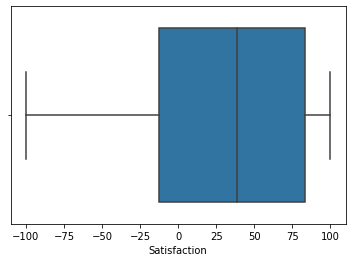

In [ ]:
sns.boxplot(valid_Satisfaction.Satisfaction);

In [ ]:
valid_Satisfaction.describe()

,Incidence rate,R rate,Satisfaction,Experience,Purchases
count,249.000000,249.000000,249.000000,249.000000,249.000000
mean,5.020161,1.147149,29.001406,0.559518,12.008032
std,4.435545,0.672821,61.252521,0.562797,13.551274
min,2.050000,0.000000,-100.000000,0.000000,3.000000
25%,3.000000,0.720000,-12.500000,0.200000,4.000000
50%,4.000000,1.090000,38.460000,0.470000,8.000000
75%,6.000000,1.540000,83.330000,0.800000,13.000000
max,49.000000,4.250000,100.000000,5.420000,129.000000


In [ ]:
doc_without_satis = doctors_clean[doctors_clean.Satisfaction == '--'].copy()
doc_without_satis

,DoctorID,Region,Category,Rank,Incidence rate,R rate,Satisfaction,Experience,Purchases
2,FDHFJ,1 9 T4,Specialist,Ambassador,33.00,1.53,--,0.00,34.0
3,BJJHCA,1 10 T3,Specialist,Ambassador,28.00,2.03,--,0.48,29.0
6,FCGIG,1 8 T3,Specialist,Titanium,18.00,1.68,--,0.26,19.0
7,HFIDE,1 11,Specialist,Ambassador,15.00,1.19,--,0.38,16.0
8,ICBGB,1 12,Specialist,Platinum Plus,15.00,0.81,--,0.25,16.0
...,...,...,...,...,...,...,...,...,...
417,FCHHD,1 14 T3,Specialist,Platinum Plus,2.33,1.40,--,0.50,10.0
418,GGCCG,1 19,Specialist,Platinum,2.33,1.30,--,0.60,10.0
431,HGAFG,1 19 T4,Specialist,Ambassador,2.20,0.88,--,0.06,16.0
433,BBAJCF,1 9 T4,Specialist,Ambassador,2.17,1.68,--,0.11,19.0


In [ ]:
doctors_clean.Satisfaction.value_counts().sort_values(ascending=False)

--         186
100.00      45
-100.00     20
0.00        13
-50.00       8
          ... 
85.96        1
65.22        1
31.58        1
23.08        1
58.33        1
Name: Satisfaction, Length: 99, dtype: int64

In [ ]:
bean_ratings = doctors_clean.groupby(['Region'], as_index=False).agg({'rating': 'mean', 'review': 'count'})

In [ ]:
doctors_per_region = doctors_clean.groupby(['Region'], as_index=False).agg({'DoctorID': 'count'})
doctors_per_region.rename(columns = {'DoctorID':'Count'}, inplace = True)
doctors_per_region

,Region,Count
0,1 10,15
1,1 10 T3,8
2,1 11,23
3,1 12,23
4,1 12 T3,6
5,1 12 T4,2
6,1 13,34
7,1 13 T3,11
8,1 13 T4,1
9,1 14,32


In [ ]:
doctors_per_region.sort_values('Count', ascending=False);

In [ ]:
doctors_clean.groupby(['Region'])['DoctorID'].count()

Region
1 10       15
1 10 T3     8
1 11       23
1 12       23
1 12 T3     6
1 12 T4     2
1 13       34
1 13 T3    11
1 13 T4     1
1 14       32
1 14 T3    15
1 14 T4     4
1 19       31
1 19 20     1
1 19 T3    13
1 19 T4     9
1 21 T3     4
1 21 T4     2
1 4CP       1
1 8        21
1 8 T3     14
1 8 T4      6
1 9        32
1 9 T3     11
1 9 T4      7
17          6
2 11        9
2 6 10      1
2 6 12      5
2 6 13      6
2 6 14      2
2 6 19      5
2 6 8       4
2 6 9       5
2 7 10      7
2 7 12      6
2 7 13      6
2 7 14      7
2 7 19     14
2 7 8       5
2 7 9       8
22 18       7
23 3        1
3 16        1
4 15        3
5 18        1
Name: DoctorID, dtype: int64

In [ ]:
doctors_clean.groupby(['Region'])['Purchases'].mean()

Region
1 10        15.000000
1 10 T3     11.375000
1 11        10.565217
1 12        14.913043
1 12 T3     14.833333
1 12 T4     22.500000
1 13        10.382353
1 13 T3      9.909091
1 13 T4     30.000000
1 14        12.156250
1 14 T3     11.666667
1 14 T4     19.500000
1 19         9.064516
1 19 20    129.000000
1 19 T3     10.769231
1 19 T4     25.333333
1 21 T3      8.750000
1 21 T4     11.000000
1 4CP        6.000000
1 8         10.809524
1 8 T3      10.928571
1 8 T4      18.500000
1 9         10.812500
1 9 T3       7.636364
1 9 T4      23.428571
17           4.500000
2 11         5.666667
2 6 10       5.000000
2 6 12       3.800000
2 6 13       4.500000
2 6 14       3.000000
2 6 19       3.600000
2 6 8        4.250000
2 6 9        5.200000
2 7 10       5.142857
2 7 12       6.166667
2 7 13       7.666667
2 7 14       3.571429
2 7 19       4.785714
2 7 8        4.600000
2 7 9        4.125000
22 18        6.285714
23 3        14.000000
3 16        14.000000
4 15        23.333333
5 1

In [ ]:
# Used packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Question2: Can you find a relationship between purchases and complaints?

In [ ]:
complaints = pd.read_csv('data/complaints.csv')
complaints.info()

,DoctorID,Complaint Type,Qty
0,EHAHI,Correct,10
1,EHDGF,Correct,2
2,EHDGF,Unknown,3
3,EHDIJ,Correct,8
4,EHDIJ,Incorrect,2
...,...,...,...
430,BHGIFC,Incorrect,1
431,BHHDDF,Correct,1
432,CJAFAB,Incorrect,1
433,CAAHID,Correct,2


In [ ]:
# Remove NA
complaints_clean = complaints.dropna(axis=0, subset=['Complaint Type']).copy()

complaints_clean.describe()

,Qty
count,433.000000
mean,1.796767
std,1.635907
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,15.000000


In [ ]:
# merge doctors & complaints tables to find corr
doctors_complaints = pd.merge(doctors_clean, complaints_clean, on=["DoctorID"])
doctors_complaints.head(2)

,DoctorID,Region,Category,Rank,Incidence rate,R rate,Satisfaction,Experience,Purchases,Complaint Type,Qty
0,FCBDC,2 7 19,Specialist,Silver Plus,14.0,0.07,--,0.07,14.0,Unknown,1
1,IFDIB,1 19 T3,Specialist,Titanium,13.0,1.29,37.50,0.14,14.0,Correct,1


In [ ]:
# Drop other columns
#doctors_complaints.drop(['Region', 'Category', 'Rank', 'Incidence rate', 'R rate',
       #'Satisfaction', 'Experience'],  axis=1,inplace=True)
doctors_complaints.rename(columns = {'Qty':'num_complaints'}, inplace = True)
doctors_complaints.head(2)

,DoctorID,Region,Category,Rank,Incidence rate,R rate,Satisfaction,Experience,Purchases,Complaint Type,num_complaints
0,FCBDC,2 7 19,Specialist,Silver Plus,14.00,0.07,--,0.07,14.0,Unknown,1
1,IFDIB,1 19 T3,Specialist,Titanium,13.00,1.29,37.50,0.14,14.0,Correct,1
2,FDHGC,1 14,Specialist,Titanium,12.00,0.85,--,0.62,13.0,Correct,4
3,FDHGC,1 14,Specialist,Titanium,12.00,0.85,--,0.62,13.0,Incorrect,4
4,FDHGC,1 14,Specialist,Titanium,12.00,0.85,--,0.62,13.0,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
120,IAEBD,1 19 20,Specialist,Ambassador,2.31,1.29,84.29,1.09,129.0,Correct,3
121,IAEBD,1 19 20,Specialist,Ambassador,2.31,1.29,84.29,1.09,129.0,Incorrect,1
122,AIABDJ,1 10,Specialist,Ambassador,2.18,0.80,11.76,0.77,35.0,Correct,1
123,AIABDJ,1 10,Specialist,Ambassador,2.18,0.80,11.76,0.77,35.0,Unknown,1


In [ ]:
doctors_complaints.corr()

,Incidence rate,R rate,Experience,Purchases,num_complaints
Incidence rate,1.000000,-0.138650,-0.071149,-0.048470,0.150484
R rate,-0.138650,1.000000,0.148877,-0.091575,0.078412
Experience,-0.071149,0.148877,1.000000,0.181792,0.044224
Purchases,-0.048470,-0.091575,0.181792,1.000000,0.013642
num_complaints,0.150484,0.078412,0.044224,0.013642,1.000000


complaints correlate with Purchases 0.013 (week correlation). Howerver, complaints shows 0.078 correlation with R rate!

## Question3: Define new doctor segments that help the company improve marketing efforts and customer service

In [ ]:
doctors_clean.columns

Index(['DoctorID', 'Region', 'Category', 'Rank', 'Incidence rate', 'R rate',
       'Satisfaction', 'Experience', 'Purchases'],
      dtype='object')

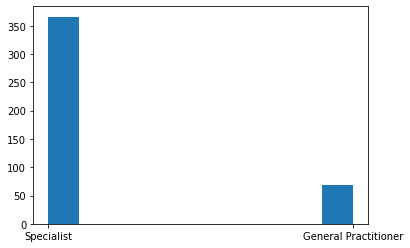

In [ ]:
plt.hist(doctors_clean.Category);

In [ ]:
doctors_clean.Category

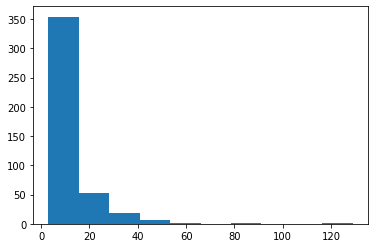

In [ ]:
plt.hist(doctors_clean.Purchases);

# Explore

In [ ]:
complaints['Complaint Type'].value_counts()

Correct      205
Incorrect    118
Unknown      103
Specific       6
R&R            1
Name: Complaint Type, dtype: int64

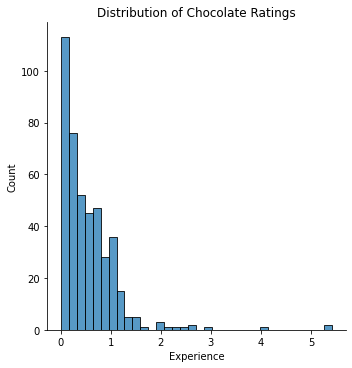

In [ ]:
# Visualize distribution of chocolate ratings
sns.displot(data=doctors_clean, x='Experience')
plt.title('Distribution of Chocolate Ratings')
plt.show()

In [ ]:
#check duplicate:
doctors.duplicated().value_counts(), complaints.duplicated().value_counts()


(False    437
 dtype: int64,
 False    435
 dtype: int64)

In [ ]:
doctors_clean.Rank.value_counts()

Ambassador       115
Platinum          77
Titanium          69
Platinum Plus     54
Gold Plus         50
Silver Plus       44
Gold              22
Silver             3
Titanium Plus      1
Name: Rank, dtype: int64

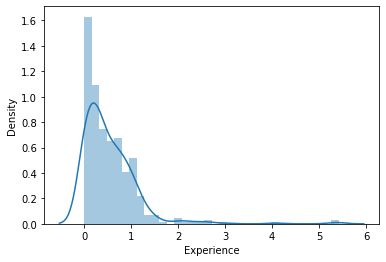

In [ ]:
sns.distplot(doctors_clean['Experience']);

In [ ]:
import pandas as pd
doctors = pd.read_csv('data/doctors.csv')
doctors

,DoctorID,Region,Category,Rank,Incidence rate,R rate,Satisfaction,Experience,Purchases
0,AHDCBA,4 15,Specialist,Ambassador,49.00,0.90,53.85,1.20,49.0
1,ABHAHF,1 8 T4,General Practitioner,Ambassador,37.00,0.00,100.00,0.00,38.0
2,FDHFJ,1 9 T4,Specialist,Ambassador,33.00,1.53,--,0.00,34.0
3,BJJHCA,1 10 T3,Specialist,Ambassador,28.00,2.03,--,0.48,29.0
4,FJBEA,1 14 T4,Specialist,Ambassador,23.00,0.96,76.79,0.75,24.0
...,...,...,...,...,...,...,...,...,...
432,AIABDJ,1 10,Specialist,Ambassador,2.18,0.80,11.76,0.77,35.0
433,BBAJCF,1 9 T4,Specialist,Ambassador,2.17,1.68,--,0.11,19.0
434,GGCFB,1 19 T4,Specialist,Ambassador,2.14,0.77,--,0.27,22.0
435,FDCEG,1 9,Specialist,Ambassador,2.13,0.84,100.00,0.32,25.0


In [ ]:
#check duplicate:
doctors.duplicated().sum(),orders.duplicated().sum(),complaints.duplicated().sum(),instructions.duplicated().sum()

(0, 0, 0, 0)

In [ ]:
orders = pd.read_csv('data/orders.csv')
orders

,DoctorID,OrderID,OrderNum,Condition A,Condition B,Condition C,Condition D,Condition F,Condition G,Condition H,Condition I,Condition J
0,ABJEAI,DGEJFDC,AIBEHCJ,False,False,False,False,False,True,True,False,Before
1,HBIEA,DGAJDAH,AIJIHGB,False,True,NaN,False,False,True,False,True,Before
2,GGCCD,DGBBDCB,AFEIHFB,False,False,False,False,False,False,False,False,NaN
3,EHHGF,DGCDCCF,AIBJJEE,False,False,False,True,False,False,True,False,Before
4,EHHGF,DGCFAGC,AEDBBDC,False,False,False,False,False,False,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
252,FJFEG,DGDBGJH,AIBCDCE,False,True,False,False,False,True,True,False,Before
253,FJFEG,DGDBGGI,AIBCDGD,False,False,True,False,False,False,True,False,Before
254,FJFEG,DGEABGI,AIBFJHE,True,False,False,False,False,False,False,False,Before
255,FJFEG,DGEABGI,AIBFJHE,True,False,False,True,False,False,False,False,Before


In [ ]:
instructions = pd.read_csv('data/instructions.csv')
instructions

,DoctorID,Instructions
0,ADIFBD,Yes
1,ABHBED,No
2,FJFEG,Yes
3,AEBDAB,No
4,AJCBFE,Yes
...,...,...
72,ABEAFF,Yes
73,FCGCI,Yes
74,FBAHD,Yes
75,FCABB,Yes


## 🧑‍⚖️ Judging criteria

| CATEGORY | WEIGHTING | DETAILS                                                              |
|:---------|:----------|:---------------------------------------------------------------------|
| **Recommendations** | 35%       | <ul><li>Clarity of recommendations - how clear and well presented the recommendation is.</li><li>Quality of recommendations - are appropriate analytical techniques used & are the conclusions valid?</li><li>Number of relevant insights found for the target audience.</li></ul>       |
| **Storytelling**  | 35%       | <ul><li>How well the data and insights are connected to the recommendation.</li><li>How the narrative and whole report connects together.</li><li>Balancing making the report in-depth enough but also concise.</li></ul> |
| **Visualizations** | 20% | <ul><li>Appropriateness of visualization used.</li><li>Clarity of insight from visualization.</li></ul> |
| **Votes** | 10% | <ul><li>Up voting - most upvoted entries get the most points.</li></ul> |

## ✅ Checklist before publishing into the competition
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- **Remove redundant cells** like the judging criteria, so the workbook is focused on your story.
- Make sure the workbook reads well and explains how you found your insights. 
- Try to include an **executive summary** of your recommendations at the beginning.
- Check that all the cells run without error

## ⌛️ Time is ticking. Good luck!